# Challenge Description
We got employee data from a few companies. We have data about all employees who joined from 2011/01/24 to 2015/12/13. For each employee, we also know if they are still at the company as of 2015/12/13 or they have quit. Beside that, we have general info about the employee, such as avg salary during her tenure, dept, and yrs of experience.
As said above, the goal is to predict employee retention and understand its main drivers. Specifically, you should:
Assume, for each company, that the headcount starts from zero on 2011/01/23. Estimate employee headcount, for each company, on each day, from 2011/01/24 to 2015/12/13. That is, if by 2012/03/02 2000 people have joined company 1 and 1000 of them have already quit, then company headcount on 2012/03/02 for company 1 would be 1000. You should create a table with 3 columns: day, employee_headcount, company_id.

What are the main factors that drive employee churn? Do they make sense? Explain your findings.

If you could add to this data set just one variable that could help explain employee churn, what would that be?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
from pyecharts.charts import Bar,Pie,Grid,Line
from pyecharts import options as opts
import pyecharts

In [3]:
df = pd.read_csv('./employee_retention.csv')

In [4]:
df.shape

(24702, 7)

In [5]:
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [6]:
df.describe()

,employee_id,company_id,seniority,salary
count,24702.000000,24702.000000,24702.000000,24702.000000
mean,501604.403530,3.426969,14.127803,138183.345478
std,288909.026101,2.700011,8.089520,76058.184573
min,36.000000,1.000000,1.000000,17000.000000
25%,250133.750000,1.000000,7.000000,79000.000000
50%,500793.000000,2.000000,14.000000,123000.000000
75%,753137.250000,5.000000,21.000000,187000.000000
max,999969.000000,12.000000,99.000000,408000.000000


In [7]:
df['quit_date'].isna().sum()

11192

In [8]:
df['quit'] = df['quit_date'].isna()
df['quit'] = df['quit'].map({False:1, True:0})

In [9]:
df_quit = df[df['quit'] == 1]
df_not_quit = df[df['quit'] == 0]

- #### About half of people quit

## 1. Explanatory Data Analysis

In [10]:
df.isna().any()

employee_id    False
company_id     False
dept           False
seniority      False
salary         False
join_date      False
quit_date       True
quit           False
dtype: bool

## 1.1 Check within dept

In [11]:
np.unique(df['dept'])

array(['customer_service', 'data_science', 'design', 'engineer',
       'marketing', 'sales'], dtype=object)

In [12]:
df.duplicated().any()

False

In [13]:
grouped_quit_dept = df_quit.groupby('dept')['employee_id'].count().reset_index()
grouped_not_dept = df_not_quit.groupby('dept')['employee_id'].count().reset_index()

In [14]:
attr = grouped_quit_dept['dept'].to_list()
v1 = grouped_quit_dept['employee_id'].to_list()
v2 = grouped_not_dept['employee_id'].to_list()
bar2 = (Bar().add_xaxis(attr)
            .add_yaxis("QUIT",v1, category_gap="30%", color='#619999')
        .add_yaxis("NOT QUIT",v2, category_gap="30%", color='#c26767')
        .set_global_opts(title_opts=opts.TitleOpts(title="QUIT BY DEPT"),
                         #datazoom_opts=opts.DataZoomOpts(),
                        xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-30)))
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
       )
bar2.render_notebook()

In [15]:
grouped_dept = df.groupby('dept')['quit'].mean().reset_index()

In [16]:
attr = grouped_dept['dept'].to_list()
v1 = grouped_dept['quit'].to_list()
bar2 = (Bar().add_xaxis(attr)
            .add_yaxis("Quit Rate",v1, category_gap="30%", color='#619999')
        .set_global_opts(title_opts=opts.TitleOpts(title="Quit Rate BY DEPT"),
                         #datazoom_opts=opts.DataZoomOpts(),
                        xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-30)))
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
       )
bar2.render_notebook()

- #### Quit rate is about the same across dept

## 1.2 Check with Senority

In [17]:
np.unique(df['seniority'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 98, 99])

In [18]:
grouped_quit_se = df_quit.groupby('seniority')['employee_id'].count().reset_index()
grouped_not_se = df_not_quit.groupby('seniority')['employee_id'].count().reset_index()

In [19]:
attr = grouped_quit_se['seniority'].to_list()
v1 = grouped_quit_se['employee_id'].to_list()
v2 = grouped_not_se['employee_id'].to_list()
bar2 = (Bar().add_xaxis(attr)
            .add_yaxis("QUIT",v1, category_gap="30%", color='#619999')
        .add_yaxis("NOT QUIT",v2, category_gap="30%", color='#c26767')
        .set_global_opts(title_opts=opts.TitleOpts(title="Quit By Seniority"),
                         #datazoom_opts=opts.DataZoomOpts(),
                        xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-30)))
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
       )
bar2.render_notebook()

In [20]:
grouped_se = df.groupby('seniority')['quit'].mean().reset_index()

In [21]:
attr = grouped_se['seniority'].to_list()
v1 = grouped_se['quit'].to_list()
bar2 = (Bar().add_xaxis(attr)
            .add_yaxis("Quit Rate",v1, category_gap="30%", color='#619999')
        .set_global_opts(title_opts=opts.TitleOpts(title="Quit Rate BY Seniority"),
                         #datazoom_opts=opts.DataZoomOpts(),
                        xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-30)))
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False),markline_opts=opts.MarkLineOpts(
                data=[opts.MarkLineItem(y=0.54)]))
       )
bar2.render_notebook()

- #### The quit rate is very high when seniority is 98 and 99
- #### Let's check the data

In [22]:
df[df['seniority'] >= 98]

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,quit
24700,97289.0,10,engineer,98,266000.0,2011-12-13,2015-01-09,1
24701,604052.0,1,marketing,99,185000.0,2011-07-26,2013-12-06,1


- #### There were only two of them were above 98, identified as outliers

In [23]:
df = df[df['seniority'] < 98]

## 1.3 Check with Salary

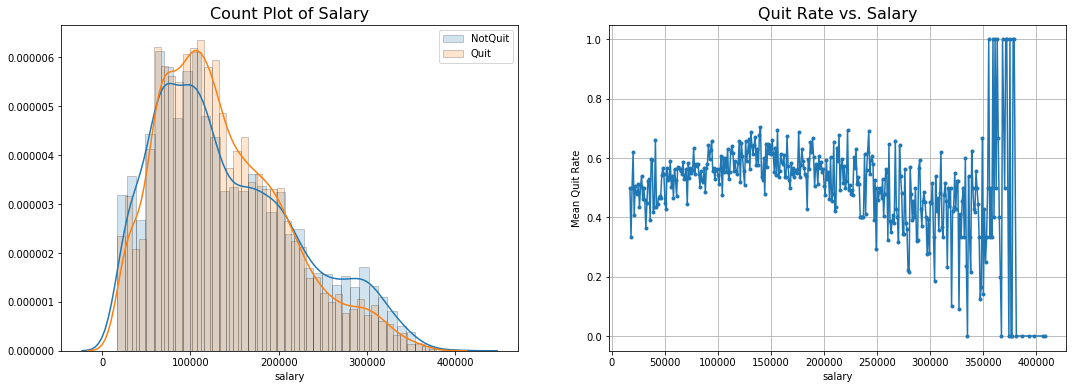

In [24]:
# Visualization of different sources
grouped = df[['salary', 'quit']].groupby('salary').mean().reset_index()
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(df[df['quit'] == False]['salary'], label='NotQuit', 
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(df[df['quit'] == True]['salary'], label='Quit', 
             ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Count Plot of Salary', fontsize=16)
ax[0].legend()
ax[1].plot(grouped['salary'], grouped['quit'], '.-')
ax[1].set_title('Quit Rate vs. Salary', fontsize=16)
ax[1].set_xlabel('salary')
ax[1].set_ylabel('Mean Quit Rate')
ax[1].grid(True)
plt.show()

In [25]:
df.groupby('quit')['salary'].mean()

quit
0    141238.473910
1    135639.102754
Name: salary, dtype: float64

- #### On average, the salary of those who quited is lower than those who didn't. Relatively more people who quit were with the salary in the middle range around ~100,000
- #### Huge Flunctuation When Salary above 350,000. Let's look at it

In [26]:
high_salary = df[df['salary'] > 350000]

In [27]:
high_salary.groupby('dept').mean()

,employee_id,company_id,seniority,salary,quit
dept,,,,,
data_science,549911.200000,1.425000,21.425000,362150.000000,0.375000
engineer,487961.836364,1.218182,21.145455,363109.090909,0.527273



- #### Only two group of dept with such high salary - engineer and data science
- #### Engineers with high salatry were easier to quit

### Let's Examine by Salary Deciles

In [28]:
decile = df.groupby([pd.qcut(df['salary'], 10),df['dept']])['quit'].mean()

In [29]:
decile

salary                dept            
(16999.999, 52000.0]  customer_service    0.483287
                      data_science        0.413793
                      design              0.416667
                      engineer            0.457143
                      marketing           0.520681
                      sales               0.506361
(52000.0, 70000.0]    customer_service    0.539763
                      data_science        0.551867
                      design              0.633333
                      engineer            0.536023
                      marketing           0.487500
                      sales               0.605634
(70000.0, 89000.0]    customer_service    0.552858
                      data_science        0.571429
                      design              0.681818
                      engineer            0.494585
                      marketing           0.552632
                      sales               0.630435
(89000.0, 105000.0]   customer_service    0

- #### From this analysis, we can see that data science with salary range of (105000.0, 123000.0] quit rate is very high and marketing with salary above 250,000 is very high

# 2. Model Building

## 2.1 Cox Propotional

In [30]:
# Python3 program to find number of days 
# between two given dates 
from datetime import date 
  
def numOfDays(date1, date2): 
    return (date2-date1).days 

In [31]:
day_lst = []
for index, row in df.iterrows():
    join = row['join_date'].split('-')
    if str(row['quit_date']) == 'nan':
        day = numOfDays(date(int(join[0]),int(join[1]), int(join[2])), date(2015,12,13))
    else:
        quit = row['quit_date'].split('-')
        day = numOfDays(date(int(join[0]),int(join[1]), int(join[2])), date(int(quit[0]),int(quit[1]), int(quit[2])))
    day_lst.append(day)

In [32]:
df['day'] = day_lst

In [49]:
day_lst_2 = []
for index, row in df_quit.iterrows():
    join = row['join_date'].split('-')
    quit = row['quit_date'].split('-')
    day = numOfDays(date(int(join[0]),int(join[1]), int(join[2])), date(int(quit[0]),int(quit[1]), int(quit[2])))
    day_lst_2.append(day)

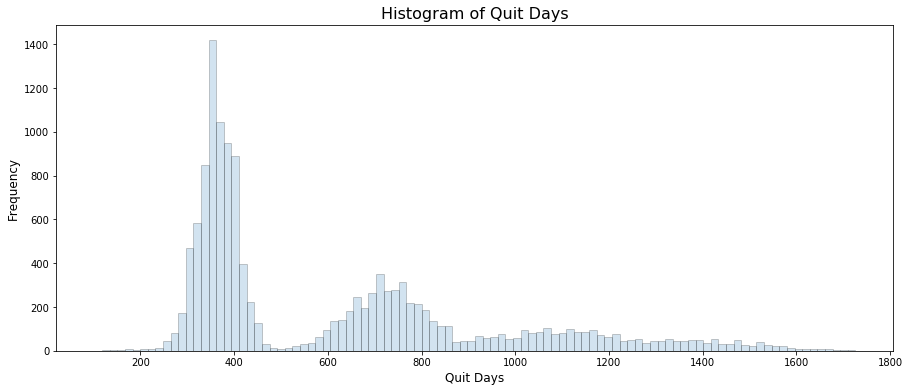

In [51]:
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
fig, ax = plt.subplots(figsize=(15, 6))
sns.distplot(day_lst_2, bins=100, kde=False, ax=ax, hist_kws=hist_kws)
ax.set_title('Histogram of Quit Days', fontsize=16)
ax.set_xlabel('Quit Days', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.show()

- #### Most people quit around a year or so

In [33]:
df_cox = df[[ 'seniority', 'salary', 'quit', 'day']]

In [34]:
df_cox['salary'] = np.log(df_cox['salary'])

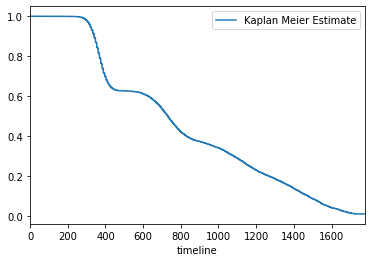

In [35]:
from lifelines import KaplanMeierFitter

## create a kmf object
kmf = KaplanMeierFitter() 

## Fit the data into the model
kmf.fit(df['day'], df['quit'],label='Kaplan Meier Estimate')

## Create an estimate
kmf.plot(ci_show=False) ## ci_show is meant for Confidence interval, since our data set is too tiny, thus i am not showing it.

- #### From KMF we can see that the prob of quiting was higher around 300-500 days

In [36]:
from lifelines import CoxPHFitter

In [37]:
cph = CoxPHFitter()
cph.fit(df_cox, duration_col='day', event_col='quit')

cph.print_summary()  # access the results using cph.summary

<lifelines.CoxPHFitter: fitted with 24700 total observations, 11192 right-censored observations>
             duration col = 'day'
                event col = 'quit'
   number of observations = 24700
number of events observed = 13508
   partial log-likelihood = -122251.37
         time fit was run = 2019-11-10 16:00:46 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
seniority   0.00       1.00       0.00             0.00             0.01                 1.00                 1.01
salary     -0.06       0.94       0.02            -0.10            -0.03                 0.91                 0.97

              z      p   -log2(p)
seniority  2.27   0.02       5.41
salary    -3.66 <0.005      11.96
---
Concordance = 0.51
Log-likelihood ratio test = 13.43 on 2 df, -log2(p)=9.69


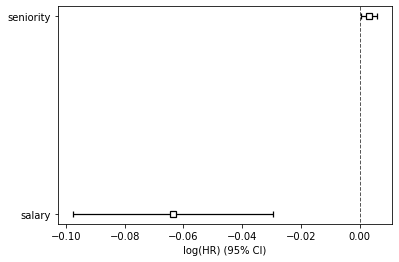

In [38]:
cph.plot()

- #### Increase 10X salary will have significantly decrease 6% chance of quiting

## 2.2 Machine Learning - RF

Since we focus on inference, we should focus on feature importance.

Let's look at what the model thinks the most importance feature

In [39]:
# Initialize H2O cluster
import h2o
from h2o.frame import H2OFrame
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch

h2o.init(ip="localhost", port=54223)
h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54223 . connected.


H2O cluster uptime:,23 secs
H2O cluster timezone:,America/Chicago
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.10
H2O cluster version age:,2 days
H2O cluster name:,H2O_from_python_guomeng_zp8ka8
H2O cluster total nodes:,1
H2O cluster free memory:,1.770 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"


In [40]:
df_h2o = df[[ 'dept','seniority', 'salary', 'quit', 'day']]
h2o_df = H2OFrame(df_h2o)

h2o_df['dept'] = h2o_df['dept'].asfactor()
h2o_df['quit'] = h2o_df['quit'].asfactor()

h2o_df.summary()

Parse progress: |█████████████████████████████████████████████████████████| 100%


,dept,seniority,salary,quit,day
type,enum,int,int,enum,int
mins,,1.0,17000.0,,3.0
mean,,14.120971659919004,138176.2753036432,,574.2851417004086
maxs,,29.0,408000.0,,1777.0
sigma,,8.054137181668152,76056.33195256838,,361.58546538426725
zeros,,0,0,,0
missing,0,0,0,0,0
0,customer_service,28.0,89000.0,1,585.0
1,marketing,20.0,183000.0,1,340.0
2,marketing,14.0,101000.0,0,426.0


In [41]:
strat_split = h2o_df['quit'].stratified_split(test_frac=0.25, seed=42)

train = h2o_df[strat_split == 'train']
test = h2o_df[strat_split == 'test']

feature = [ 'dept','seniority', 'salary']
target = 'quit'

In [42]:
model = H2ORandomForestEstimator(balance_classes=True, ntrees=100, max_depth=20, 
                                 mtries=-1, seed=42, score_each_iteration=True)
model.train(x=feature, y=target, training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


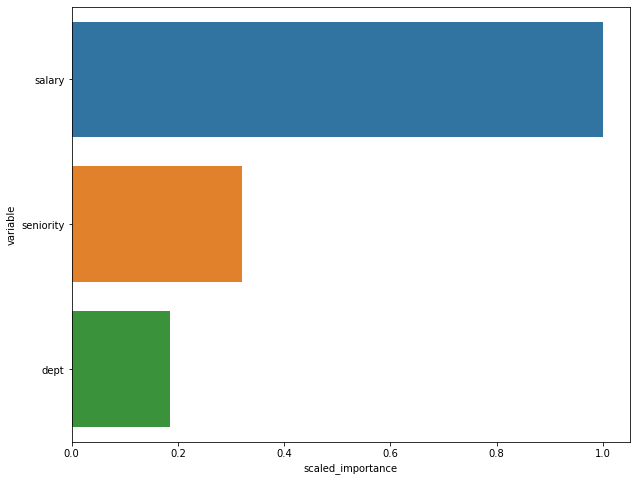

In [43]:
# Feature importance
importance = model.varimp(use_pandas=True)

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x='scaled_importance', y='variable', data=importance)
plt.show()

In [52]:
# Shutdown h2o instance
h2o.cluster().shutdown()

## Summary

1. From EDA we can see: Generally no difference acorss dept. On average, the salary of those who quited is lower than those who didn't. Relatively more people who quit were with the salary in the middle range around ~100,000. Quit rate is of huge flunctuation when salary above 350,000. Only two group of dept with such high salary - engineer and data science. Engineers with high salatry were easier to quit. We can see that data science with salary range of (105000.0, 123000.0] quit rate is very high and marketing with salary above 250,000 is very high

- #### Most people quit around a year or so


3. From Survival Analysis we can see: The prob of quiting became higher when time went by and increasing 10X salary will significantly decrease 6% chance of quiting


4. Random Forest feature importance supported that salary was more important variable

   - ### Suggestions: Focus more on the employees who have joined around a year/ salary not too high nor too low, probably range around 100,000. Maybe try raise their salary to avoid them from quitting.